# Accessing Philanthropy

### Can grant transactions data help "doers" find "funders"?

Like the for-profit world, decisions to invest in nonprofits are established and fostered through trusted relationships. So what, if any, value does large grant datasets like mine provide the nonprofit? I was curious to find out.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Grants.csv')

### This dataset leveraged below was exported from a subscription-based website: Foundation Directory Online
- it consists of just over 10,000 grant transactions from 2015-2021
- each record contains the keyword, "climate"

In [3]:
df.drop(['Unnamed: 11'], axis=1)

,G_Name,G_State,R_Name,R_City,R_StCt,Country,Subject,Year,Amount,Strategies,Description
0,New Israel Foundation,New York,Freedom Farm,Olesh,Israel,Israel,"Agriculture, fishing and forestry",2019,13555.0,Public engagement and education;Advocacy;,To foster compassion towards and prevent abuse...
1,"Grassroots International, Inc.",Massachusetts,La Via Campesina-International,Abadiño,Spain,Spain,Climate change,2017,25000.0,NaN,La Via Campesina: Forging the Links between Fo...
2,Global Greengrants Fund Inc,Colorado,Abwatuntora Climate Change Committee,Abatuntora,Vanuatu,Vanuatu,,2019,4000.0,Capacity-building and technical assistance;Gra...,Abwatuntora Climate Change Committee will use ...
3,Lord Mayor's Charitable Foundation,NaN,Abbotsford Convent,Abbotsford,Australia,Australia,Environment,2018,6605.0,Capacity-building and technical assistance;Cap...,The ACF aims to raise critically needed funds ...
4,The National Lottery Community Fund,NaN,Garioch Women for Change,Aberdeenshire,Scotland,Scotland,,2019,3143.0,"Public engagement and education;Awards, prizes...","This group will host a free, one day event in ..."
...,...,...,...,...,...,...,...,...,...,...,...
10243,Seattle Foundation,Washington,Animal Alliance Network,NaN,Rancho Cucamonga,California,Animal welfare,2021,500.0,NaN,Youth Climate Save
10244,Silicon Valley Community Foundation,California,Citizens Climate Education Corp.,NaN,Coronado,California,Climate change,2021,500.0,NaN,NaN
10245,Seattle Foundation,Washington,Animal Alliance Network,NaN,Rancho Cucamonga,California,Climate change,2021,500.0,NaN,Youth Climate Save
10246,Seattle Foundation,Washington,Animal Alliance Network,NaN,Rancho Cucamonga,California,Animal welfare,2021,500.0,NaN,To support Youth Climate Save.


In [4]:
df.shape

(10248, 12)

Data fields preceded by 'G' refer to the grant maker, or private foundation; those preceded by 'R' refer to their grant recipients, most typically non-profit organizations and universities

In [5]:
df.columns.tolist()

['G_Name',
 'G_State',
 'R_Name',
 'R_City',
 'R_StCt',
 'Country',
 'Subject',
 'Year',
 'Amount',
 'Strategies',
 'Description',
 'Unnamed: 11']

A separate "Grantmaker" table reveals the asset value of each of these foundations. That's worth taking a look at.}

In [213]:
dfG_val = pd.read_csv('Grantmaker_val.csv', header =1, index_col='Grantmaker Name')

In [214]:
dfG_val.head()

,Contact,Care Of,Street Address 1,Street Address 2,City,State,ZIP Code,Country,Telephone,Fax,E-mail,URL,Total Assets,Total Giving,Amount Funded,Grant Count,RFPs
Grantmaker Name,,,,,,,,,,,,,,,,,
Bill & Melinda Gates Foundation,NaN,NaN,500 Fifth Avenue North,NaN,Seattle,WA,98109,United States,2067093100,(206) 709-3180,info@gatesfoundation.org,http://www.gatesfoundation.org/,5.103808e+10,4.707428e+09,190087312.0,44.0,0.0
Wellcome Trust,NaN,NaN,Gibbs Bldg.,215 Euston Rd.,London,NaN,NaN,England,020 7611 8888,(0) 20 7611 8545,NaN,http://www.wellcome.ac.uk,3.757649e+10,NaN,2959227.0,3.0,0.0
Trustees of Princeton University,NaN,NaN,Princeton University,NaN,Princeton,NJ,08544,United States,6092583080,(609) 258-6743,NaN,http://www.princeton.edu/,3.152376e+10,3.901859e+08,552720.0,3.0,0.0
Kaiser Foundation Health Plan Inc,NaN,NaN,393 E. Walnut St.,NaN,Pasadena,CA,91188,United States,(510) 271-6611,NaN,NaN,http://www.kaiserpermanente.org/,2.132916e+10,2.883820e+07,285000.0,3.0,0.0
Fidelity Investments Charitable Gift Fund,NaN,NaN,"200 Seaport Blvd., Ste. 7",NaN,Boston,MA,02210-2031,United States,(800) 952-4438,(877) 665-4274,NaN,http://www.fidelitycharitable.org/,2.122355e+10,3.764812e+09,11421576.0,234.0,0.0


In [215]:
dfG_val.nlargest(10, 'Total Assets')

,Contact,Care Of,Street Address 1,Street Address 2,City,State,ZIP Code,Country,Telephone,Fax,E-mail,URL,Total Assets,Total Giving,Amount Funded,Grant Count,RFPs
Grantmaker Name,,,,,,,,,,,,,,,,,
Bill & Melinda Gates Foundation,NaN,NaN,500 Fifth Avenue North,NaN,Seattle,WA,98109,United States,2067093100,(206) 709-3180,info@gatesfoundation.org,http://www.gatesfoundation.org/,5.103808e+10,4.707428e+09,190087312.0,44.0,0.0
Wellcome Trust,NaN,NaN,Gibbs Bldg.,215 Euston Rd.,London,NaN,NaN,England,020 7611 8888,(0) 20 7611 8545,NaN,http://www.wellcome.ac.uk,3.757649e+10,NaN,2959227.0,3.0,0.0
Trustees of Princeton University,NaN,NaN,Princeton University,NaN,Princeton,NJ,08544,United States,6092583080,(609) 258-6743,NaN,http://www.princeton.edu/,3.152376e+10,3.901859e+08,552720.0,3.0,0.0
Kaiser Foundation Health Plan Inc,NaN,NaN,393 E. Walnut St.,NaN,Pasadena,CA,91188,United States,(510) 271-6611,NaN,NaN,http://www.kaiserpermanente.org/,2.132916e+10,2.883820e+07,285000.0,3.0,0.0
Fidelity Investments Charitable Gift Fund,NaN,NaN,"200 Seaport Blvd., Ste. 7",NaN,Boston,MA,02210-2031,United States,(800) 952-4438,(877) 665-4274,NaN,http://www.fidelitycharitable.org/,2.122355e+10,3.764812e+09,11421576.0,234.0,0.0
J. Paul Getty Trust,NaN,NaN,1200 GETTY CENTER DRIVE,NaN,Los Angeles,CA,90049,United States,(310) 440-6040,(310) 440-7703,GettyFoundation@getty.edu,http://www.getty.edu,1.322904e+10,1.306973e+07,20200.0,2.0,0.0
Ford Foundation,Secy.,NaN,320 East 43rd St.,NaN,New York City,NY,10017,United States,2125735000,(212) 351-3677,secretary@fordfoundation.org,http://www.fordfoundation.org,1.308124e+10,5.345005e+08,72641153.0,150.0,0.0
The Robert Wood Johnson Foundation,NaN,NaN,50 College Road East,NaN,Princeton,NJ,08540,United States,6096276000,NaN,mail@rwjf.org,http://www.rwjf.org,1.191725e+10,4.345411e+08,37096204.0,31.0,0.0
The William and Flora Hewlett Foundation,NaN,NaN,2121 Sand Hill Road,NaN,Menlo Park,CA,94025,United States,(650) 234-4500,(650) 234-4501,communications@hewlett.org,http://www.hewlett.org,1.096114e+10,3.547862e+08,582514165.0,488.0,0.0


Text(0.5, 1.0, 'Total Assets, $USD by Grantmaker Name')

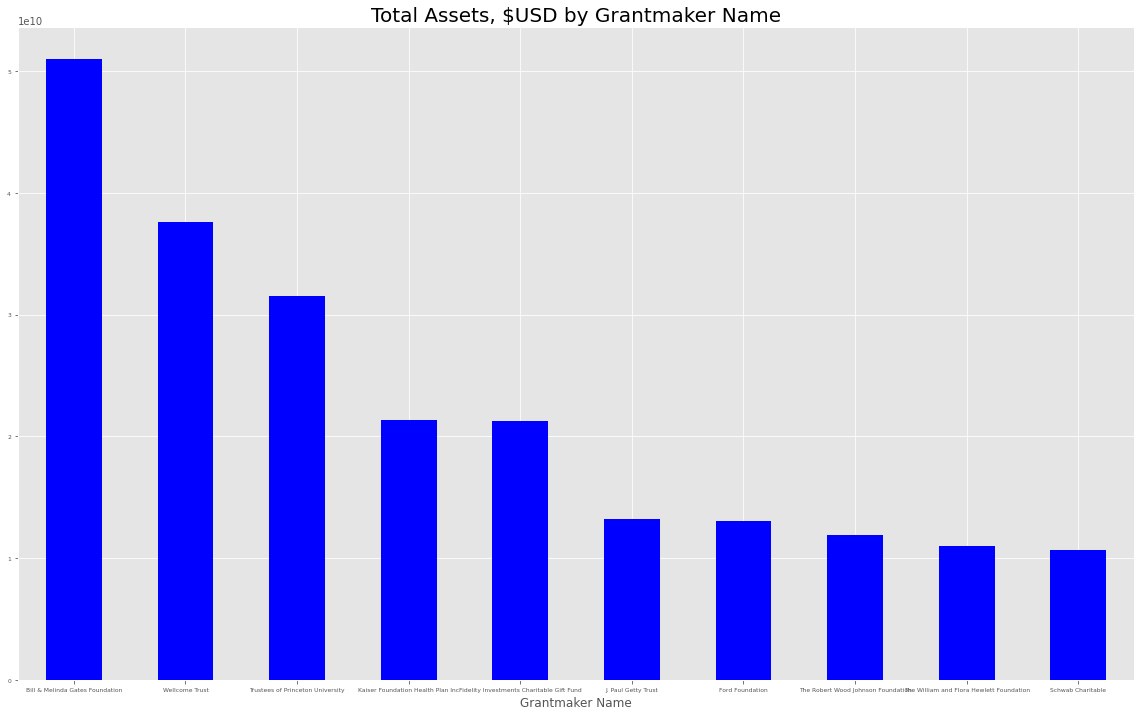

In [224]:
plt.figure(figsize = (20,12))
dfG_val['Total Assets'].sort_values(ascending=False)[:10].plot.bar(color = 'b', fontsize = 6)
plt.xticks(rotation = 0)
plt.title('Total Assets, $USD by Grantmaker Name', fontsize = 20)

## Exploring the Data Set

While sorting, grouping, and aggregating are helpful to understand the dataset, they don't really trigger any "action" for the nonprofit professional who is (likely) overwhelmed supporting multiple job descriptions. Regardless, let's take a look at a few simple exercises to see what trends emerge.

In [6]:
print(f"This subset of grant transactions sums to ${df['Amount'].sum()}")

This subset of grant transactions sums to $3435967007.0


Text(0.5, 1.0, 'Distribution of climate-related grant transactions, 2015-2021')

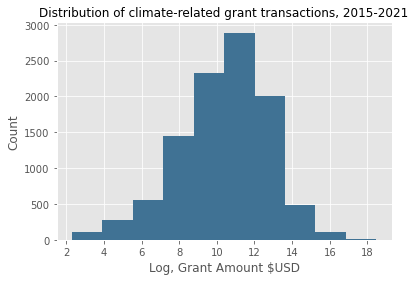

In [7]:
#### Titles, etc. required in all visuals
plt.hist((np.log(df['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of climate-related grant transactions, 2015-2021', fontsize = 12)

Many of the foundations represented in this data set have awarded hundreds of grants:

In [8]:
df.value_counts('G_Name')

G_Name
Global Greengrants Fund Inc                                             551
The William and Flora Hewlett Foundation                                474
Environmental Defense Fund Incorporated                                 240
Seattle Foundation                                                      221
The California Endowment                                                219
                                                                       ... 
Minnesota Center for Philanthropy Inc                                     1
Minnesota Environmental Fund                                              1
Miramar Charitable Foundation Miramar Fiduciary Corporation, Trustee      1
Mirowski Family Foundation, Inc.                                          1
Zyme Solutions Private Limited                                            1
Length: 1550, dtype: int64

...and many nonprofit organizations have worked very hard to secure as many as possible!

In [9]:
df.value_counts('R_Name')

R_Name
Climate Solutions                        271
350org                                   239
Sierra Club Foundation                   209
Citizens Climate Education Corp.         191
Alliance for Climate Protection          147
                                        ... 
Kitopua Ndomonock-Lake Natron              1
Kiss the Ground                            1
Kiribati Islands Conservation Society      1
King's College London                      1
Škola dokorán - Wide Open School n.o.      1
Length: 3282, dtype: int64

Because 2021 is not yet a complete year, I've normalized the annual data by number of months represented in each, to return a "average monthly" value for each year. Note 2021 has been normalized to 10 months.

In [10]:
annual = df.groupby('Year').agg({'Amount': sum})
annual['m'] = [12, 12, 12, 12, 12, 12, 10]
annual['avg_m'] = annual.Amount/annual.m
annual

,Amount,m,avg_m
Year,,,
2015,462436590.0,12,3.853638e+07
2016,548909263.0,12,4.574244e+07
2017,516402540.0,12,4.303354e+07
2018,716004443.0,12,5.966704e+07
2019,418284112.0,12,3.485701e+07
2020,315300401.0,12,2.627503e+07
2021,458629658.0,10,4.586297e+07


Plotting this "monthly average" per year reveals a drop in 2020, when climate-related grant money was redirected to either the pandemic or social justice-related programs:

Text(0.5, 1.0, 'Avg Monthly Climate-Related Grants by Year')

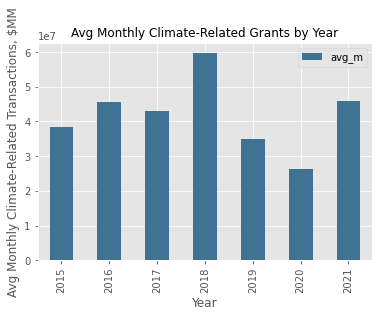

In [11]:
annual.plot(x=None, y='avg_m', kind='bar', color = "#407294")

plt.xlabel('Year')
plt.ylabel('Avg Monthly Climate-Related Transactions, $MM')
plt.title('Avg Monthly Climate-Related Grants by Year', fontsize = 12)

Let's look at the top funders (by dollar amount) were over the recorded time period. Those familiar with the tech industry can imagine where some of this wealth came from:

In [12]:
topF = pd.pivot_table(df, values='Amount', index='G_Name', aggfunc=np.sum)

In [13]:
topF.nlargest(10, 'Amount')

,Amount
G_Name,
The William and Flora Hewlett Foundation,577422665.0
The David and Lucile Packard Foundation,264858114.0
Oak Foundation,210943131.0
John D. and Catherine T. MacArthur Foundation,201382810.0
Bill & Melinda Gates Foundation,189987311.0
Sea Change Foundation,106482500.0
American Family Mutual Insurance Company Contributions Program,105000000.0
FedEx Corporation Contributions Program,100000000.0
Kresge Foundation,78723547.0


The top recipients by dollar amount include the following:

In [14]:
topR = pd.pivot_table(df, values='Amount', index='R_Name', aggfunc=np.sum)
topR.nlargest(10, 'Amount')

,Amount
R_Name,
ClimateWorks Foundation,354982750.0
Energy Foundation,239460400.0
European Climate Foundation,177251702.0
George Floyd Protests 2020 - Unknown Recipient,155000000.0
Alliance for Climate Protection,116537843.0
Yale University,108640898.0
Rockefeller Philanthropy Advisors,94634043.0
New Venture Fund,67584624.0
Centro Internacional de Mejoramiento de Maiz y Trigo,60265768.0


Geographically, the top states securing these dollars include:

In [15]:
topStates = df[df.Country == 'United States'].pivot_table(values='Amount', index='R_StCt', aggfunc=np.sum)
topStates.nlargest(10, 'Amount')

,Amount
R_StCt,
California,1.046139e+09
District of Columbia,5.288241e+08
New York,3.099845e+08
Massachusetts,1.117655e+08
Virginia,6.306421e+07
Colorado,4.820682e+07
Washington,3.748119e+07
Minnesota,3.436526e+07
New Jersey,3.221881e+07


The "Subject" column is not consistently populated. When it is, the values range from very broad (e.g., "climate change", "nonprofits") to very focused (e.g., "toxic substance control"). Although it can help establish a funder's giving priority, it can't be relied upon. 

In [16]:
df.value_counts('Subject')

Subject
Climate change            6101
                          1174
Environmental justice      280
Environment                271
Energy resources           251
                          ... 
Consumer protection          1
Libraries                    1
Learning disorders           1
Law                          1
Hospital care                1
Length: 260, dtype: int64

In [17]:
priorities = pd.pivot_table(df, values='Amount', index='Subject', aggfunc=np.sum)
priorities.nlargest(15, 'Amount')

,Amount
Subject,
Climate change,2.069207e+09
,1.844074e+08
Social rights,1.614487e+08
Sustainable agriculture,1.221666e+08
Renewable energy,7.565151e+07
Environment,5.537708e+07
Energy efficiency,5.422783e+07
Energy resources,5.409723e+07
Natural resources,5.050316e+07


Are there any trends discerned in the time period available?

_Note: I considered creating a function for this, but it was so simple to do manually..._

In [18]:
df15 = df[df.Year == 2015].copy()
df16 = df[df.Year == 2016].copy()
df17 = df[df.Year == 2017].copy()
df18 = df[df.Year == 2018].copy()
df19 = df[df.Year == 2019].copy()
df20 = df[df.Year == 2020].copy()

Text(0.5, 1.0, 'Distribution of grant transactions: 2015')

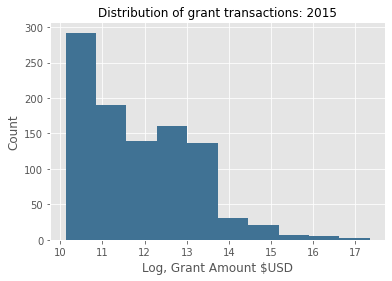

In [19]:
plt.hist((np.log(df15['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2015', fontsize = 12)

Text(0.5, 1.0, 'Distribution of grant transactions: 2016')

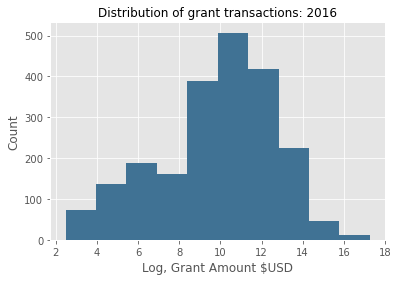

In [20]:
plt.hist((np.log(df16['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2016', fontsize = 12)

Text(0.5, 1.0, 'Distribution of grant transactions: 2017')

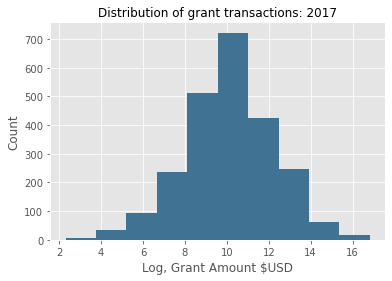

In [21]:
plt.hist((np.log(df17['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2017', fontsize = 12)

Text(0.5, 1.0, 'Distribution of grant transactions: 2018')

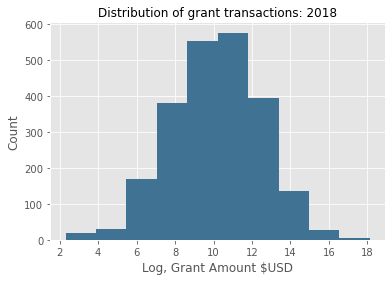

In [22]:
plt.hist((np.log(df18['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2018', fontsize = 12)

Text(0.5, 1.0, 'Distribution of grant transactions: 2019')

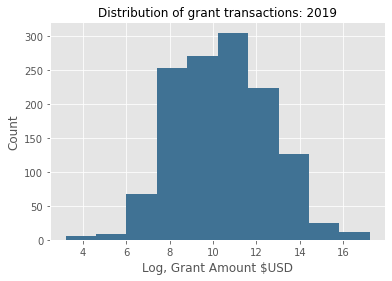

In [23]:
plt.hist((np.log(df19['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2019', fontsize = 12)

Text(0.5, 1.0, 'Distribution of grant transactions: 2020')

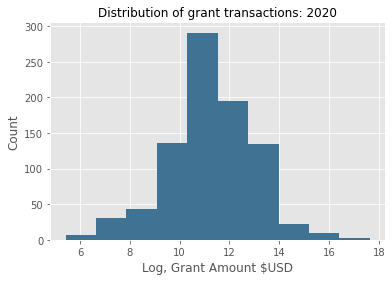

In [24]:
plt.hist((np.log(df20['Amount'].dropna())), color = "#407294")

plt.xlabel('Log, Grant Amount $USD')
plt.ylabel('Count')
plt.title('Distribution of grant transactions: 2020', fontsize = 12)

The program description for each grant transaction is full of rich details...what to do with this data? 

_Note: I wrestled with this column for far too long (!) trying to tease out keywords I specified in a dictionary to demonstrate if certain trends would emerge, such as growing investment in reforestation funds. I ultimately decided that 1) how I created the dataset (with use of keyword, "climate") resulted in some non-climate change related programs getting incorporated, and 2) the description field is not systematically populated. I would have been better off experimenting with the subject field(although that has issues, too, because it is populated by FDO, the grant database manager._

So instead I asked myself this question: do recipients with longer string description win more money?

In [25]:
df['D_len'] = df.Description.str.split().str.len()

In [26]:
df.nlargest(5, 'D_len')

,G_Name,G_State,R_Name,R_City,R_StCt,Country,Subject,Year,Amount,Strategies,Description,Unnamed: 11,D_len
2000,Global Greengrants Fund Inc,Colorado,Municipio Autónomo 16 de Febrero,Chiapas,Mexico,Mexico,,2017,1944.0,General support;Participatory grantmaking;,In Zinacantn there is no enough land available...,NaN,506.0
3779,Global Greengrants Fund Inc,Colorado,Sierra Club John Muir - WI Chapter,Madison,Wisconsin,United States,Rivers and lakes,2019,500.0,Capacity-building and technical assistance;Adv...,The Sierra Club John Muir Wisconsin Chapter (J...,NaN,482.0
8425,"FASOL - Fondo Acción Solidaria, A.C.",NaN,Nawésari Tibúame,Wachochi -sede-,NaN,NaN,,2018,1831.0,Public engagement and education;Conferences an...,This initiative is emerging in an area where i...,NaN,479.0
362,"The John Ben Snow Foundation, Inc.",New York,Merry-Go-Round Playhouse,Auburn,New York,United States,Theater,2020,7500.0,NaN,"When the pandemic began to escalate in the US,...",NaN,475.0
6441,The Morris and Gwendolyn Cafritz Foundation,District of Columbia,Eco City Farms,Riverdale,Maryland,United States,Economic development,2019,25000.0,Advocacy;Equal access;Program support;,"This request for $35,000 in funding from the M...",NaN,473.0


Text(0.5, 1.0, 'Length of Program Description vs Grant Award')

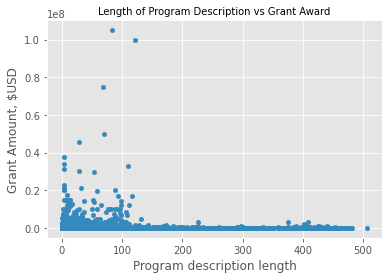

In [27]:
df.plot.scatter('D_len', 'Amount')
plt.xlabel('Program description length')
plt.ylabel('Grant Amount, $USD')
plt.title('Length of Program Description vs Grant Award', fontsize = 10)

Removing outliers from y-axis:

In [28]:
scatter_df = df[['D_len', 'Amount']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis = 1)]

In [29]:
scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis = 1)

0         True
1         True
2         True
3        False
4         True
         ...  
10242     True
10243     True
10245     True
10246     True
10247     True
Length: 9251, dtype: bool

...and the answer is, no! There is doesn't seem to be any relationship between description length and grant amount!

Text(0.5, 1.0, 'Length of Program Description vs Grant Award')

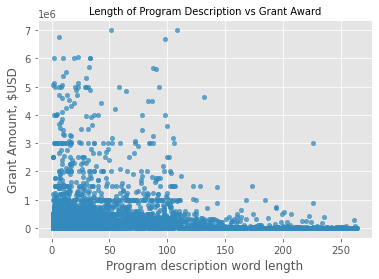

In [30]:
scatter_df.plot.scatter(x = 'D_len', y = 'Amount', alpha=0.75)
plt.xlabel('Program description word length')
plt.ylabel('Grant Amount, $USD')
plt.title('Length of Program Description vs Grant Award', fontsize = 10)

The subject is not always populated, but if it is, the category ranges from very broad (e.g., "climate change", "nonprofits") to very focused ("toxic substance control").

# While all of this is interesting, it doesn't really add value for a nonprofit interested in finding a new source of funding.

What would be, though, is focusing the data to the foundations that a nonprofit should target in their communications and marketing. This lead me to think about "regranters".

I've never been able to tease these entities out from traditional spreadsheet software. Armed with the understanding of the "inner" merge, I was excited to test it out.

### But first--what is a regranter?

Re-granters are organizations who both receive foundation support as well as distribute their own. Think of these organizations as intermediaries for larger entities with a deeper reach into the communities their recipients serve. In this regard, they are multiple networking steps closer than say, Bill or Melinda Gates, Michael Bloomberg, or any other executive of a major foundation.

But to get the list, I need to identify which grantmakers are also grant recipients. The steps that follow trace my efforts to merge two tables: one for Grantmakers, and another one listing Recipients for this dataset

In [31]:
dfG = pd.read_csv('Grantmakers.csv')

In [32]:
dfG.head()

,G_Name,Year,Amount,Unnamed: 3
0,New Israel Foundation,2019,13555.0,NaN
1,"Grassroots International, Inc.",2017,25000.0,NaN
2,Global Greengrants Fund Inc,2019,4000.0,NaN
3,Lord Mayor's Charitable Foundation,2018,6605.0,NaN
4,The National Lottery Community Fund,2019,3143.0,NaN


Consolidating the table to sum and count of grants for each grantmaker:

In [33]:
dfG_pivot = pd.pivot_table(dfG, values='Amount', index='G_Name', aggfunc=['sum', 'count']).rename(columns={'sum': 'sumAmt', 'count': 'ctAmt'})


In [34]:
dfG_pivot.nlargest(10, ('sumAmt', 'Amount'))

,sumAmt,ctAmt
,Amount,Amount
G_Name,,
The William and Flora Hewlett Foundation,577422665.0,474
The David and Lucile Packard Foundation,264858114.0,204
Oak Foundation,210943131.0,116
John D. and Catherine T. MacArthur Foundation,201382810.0,111
Bill & Melinda Gates Foundation,189987311.0,43
Sea Change Foundation,106482500.0,179
American Family Mutual Insurance Company Contributions Program,105000000.0,1
FedEx Corporation Contributions Program,100000000.0,1


In [35]:
dfR = pd.read_csv('Recipients.csv')

In [36]:
dfR.head()

,R_Name,Year,Amount,Unnamed: 3
0,Freedom Farm,2019,13555.0,NaN
1,La Via Campesina-International,2017,25000.0,NaN
2,Abwatuntora Climate Change Committee,2019,4000.0,NaN
3,Abbotsford Convent,2018,6605.0,NaN
4,Garioch Women for Change,2019,3143.0,NaN


...and doing the same for each grant recipient:

In [37]:
dfR_pivot = pd.pivot_table(dfR, values='Amount', index='R_Name', aggfunc=['sum', 'count']).rename(columns={'sum': 'sumAmt', 'count': 'ctAmt'})


In [38]:
dfR_pivot.nlargest(10, ('sumAmt', 'Amount'))

,sumAmt,ctAmt
,Amount,Amount
R_Name,,
ClimateWorks Foundation,354982750.0,87
Energy Foundation,239460400.0,129
European Climate Foundation,177251702.0,80
George Floyd Protests 2020 - Unknown Recipient,155000000.0,2
Alliance for Climate Protection,116537843.0,147
Yale University,108640898.0,25
Rockefeller Philanthropy Advisors,94634043.0,41
New Venture Fund,67584624.0,83


An inner merge of each of these pivot tables reveals grant recipients who are also grantmakers ("regranters"):

In [39]:
reG = pd.merge(dfR_pivot, dfG_pivot, 'inner', left_index=True, right_index=True)

In [40]:
reG.columns = ['recdAmt', 'recdCt', 'disAmt', 'disCt']

In [41]:
reG['diff'] = reG.recdAmt - reG.disAmt

In [54]:
reG.nlargest(5, 'diff')

,recdAmt,recdCt,disAmt,disCt,diff
ClimateWorks Foundation,354982750.0,87,71730458.0,132,283252292.0
New Venture Fund,67584624.0,83,1515780.0,3,66068844.0
Nature Conservancy,31389213.0,34,63183.0,5,31326030.0
World Resources Institute,30412124.0,56,1096529.0,14,29315595.0
350org,25629216.0,239,15000.0,1,25614216.0


In [43]:
reGlst = list(reG.index)

In [44]:
len(reGlst)

57

In [45]:
netdf = df[df['G_Name'].isin(reGlst)]

### Great, but is it possible to isolate the regranters' "connections"? That is, can I identify a list of non-profit orgs connected to a given regranting organization? With pandas + NetworkX, I can!!

In [85]:
import networkx as nx
from matplotlib.pyplot import figure


def reGnet(regrantor):
    reGlst = list(reG.index)
    
    if regrantor not in reGlst:
        raise ValueError(f'Foundation name entered is not a regrantor. \n\nTry an organization \
                  from this list: \n\n{reGlst}')
    else:
        regrantor_df = netdf[netdf.G_Name == regrantor]
        
        #pivot from main df to find number of recipients
        netdf_pivot = netdf[netdf.G_Name == regrantor].pivot_table(values = 'R_Name', index='G_Name', aggfunc='count')

        print(f'Number of recipients of the {regrantor}: {int(netdf_pivot.R_Name)}')
        if int(netdf_pivot.R_Name) > 50:
            print(f'Investigate how to manipulate graph settings!!')
        

        G = nx.Graph()
        G = nx.from_pandas_edgelist(regrantor_df, 'G_Name', 'R_Name')

        figure(figsize =(10,8))
        nx.draw_shell(G, with_labels=True)
    

Number of recipients of the ClimateWorks Foundation: 132
Investigate how to manipulate graph settings!!


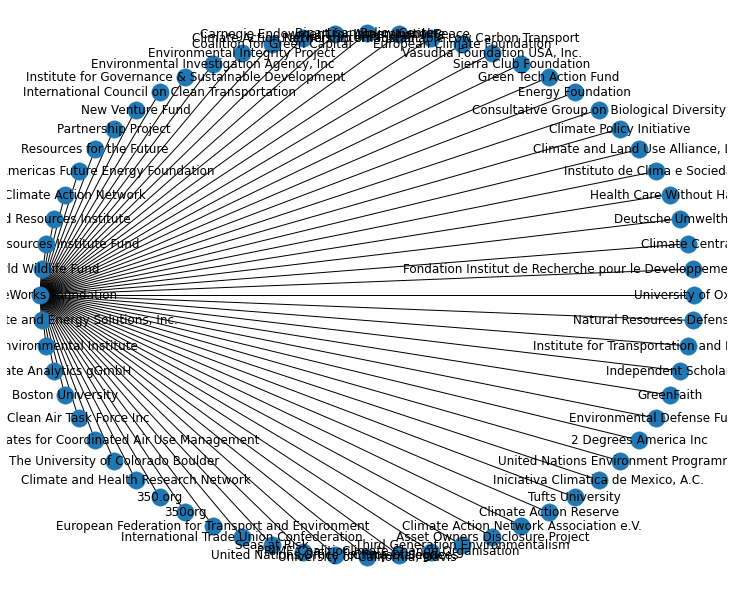

In [86]:
reGnet('ClimateWorks Foundation')

In [172]:
import pandas as pd
import numpy as np


def reGrant_pivot(regrantor):
    reGlst = list(reG.index)
    
    if regrantor not in reGlst:
        raise ValueError(f'Foundation name entered is not a regrantor. \n\nTry an organization \
                  from this list: \n\n{reGlst}')
    else:
        regrantor_df = netdf[netdf.G_Name == regrantor]
        
        #create a pivot summary of grant count + sum for each recipient
        pivot = regrantor_df.pivot_table(index = 'R_Name', values = 'Amount', aggfunc = ['sum', 'count']).rename(columns={'sum': 'sumAmt', 'count': 'ctAmt'})
        
        result = pivot.sort_values(('sumAmt', 'Amount'), ascending = False)
        length = len(result)
        
        pd.set_option('display.max_rows', length)
    
        return result.head(length)


In [173]:
reGrant_pivot('ClimateWorks Foundation')

,sumAmt,ctAmt
,Amount,Amount
R_Name,,
"Climate and Land Use Alliance, LLC",21197634.0,5
Energy Foundation,18753000.0,9
European Climate Foundation,9573253.0,11
Instituto de Clima e Sociedade,2243000.0,7
International Council on Clean Transportation,1815000.0,9
Green Tech Action Fund,1275000.0,2
"Natural Resources Defense Council, Inc.",1141500.0,5
United Nations Office for Project Services,1000000.0,1


## Although pivot tables and sorting is helpful for sorting this data, the networking functionality is by far, the most powerful element!

These types of plots ***trigger action:*** who do I need to know?

Clearly, someone associated with a “hub” would be a great place to start!

And while those connections may seem to be too many degrees of separation away, why not try a spoke? I’m excited to think of how these types of visuals can spawn further inquiry (e.g., what are the networks associated with each of the spokes?). 

With this in mind, a Python-based NetworkX graph can provide meaningful direction and focus to the nonprofit professional charged with securing funds (not to mention maintaining operations, volunteer management, fundraising campaigns, and any other number of unexpected surprises).

While it is obvious that I need to advance my understanding of NetworkX details to make these graphs more functional and informative, I am looking forward to exploring this Python package (and have three clients with whom I will test this!).

Thank you NYCDSA for transforming my workflow in just a matter of weeks!